In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set font to 12 and times new roman

plt.rcParams.update({'font.size': 12})
plt.rcParams["font.family"] = "Times New Roman"

# set path to data

# Set seed
np.random.seed(42)

# Set working directory
os.chdir(r"..") # should be the git repo root directory
print("Current working directory: " + os.getcwd())
repo_name = 'net-load-forecasting'
assert os.getcwd()[-len(repo_name):] == "net-load-forecasting", "Working directory is not the git repo root directory"



Current working directory: c:\Users\nik\Desktop\Berkeley_Projects\net-load-forecasting


# Tables & Plots for the paper

#TODO: add the exact numbers for the tables and plots from the paper

### Plot 1: Training Ratio

In [4]:
df_metrics_all = pd.read_csv(os.path.join(os.getcwd(),'data','model_results',f'df_metrics_all.csv'))

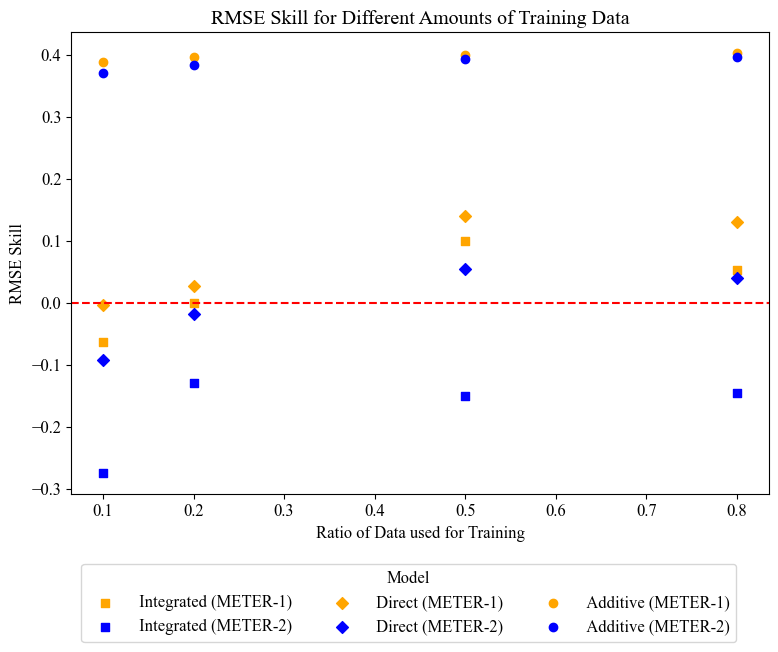

In [42]:
# Sort the DataFrame by model and season

metric_of_interest = 'rmse_skill'
metric_of_interest_formatted = metric_of_interest.replace('_', ' ').title()
if 'rmse' in metric_of_interest:
    metric_of_interest_formatted = metric_of_interest_formatted.replace('Rmse', 'RMSE')

df = df_metrics_all[['model_setup', metric_of_interest, 'METER_SCEN', 'train_ratio']].sort_values(by=['model_setup', 'METER_SCEN'])

# Define colors and shapes based on the season and model
meter2color = {1: 'orange', 2: 'blue'}
color2meter = {v: k for k, v in meter2color.items()}
model2shape = {
    'prediction_additive': 'o',
    'prediction_integrated': 's',
    'prediction_direct': 'D',
}
shape2model = {v: k for k, v in model2shape.items()}

# Map the colors and shapes to the DataFrame
df['color'] = df['METER_SCEN'].map(meter2color)
df['shape'] = df['model_setup'].map(model2shape)

# Create the scatter plot
fig, ax = plt.subplots()

legend_labels = []
for shape in set(df['shape']):
    for color in set(df.loc[df['shape'] == shape, 'color']):
        x = df.loc[(df['shape'] == shape) & (df['color'] == color), 'train_ratio']
        y = df.loc[(df['shape'] == shape) & (df['color'] == color), metric_of_interest]
        
        model_name = shape2model[shape].title()
        if model_name != '24h_persistence':
            model_name = model_name.replace('Prediction_', ' ')
        label = f'{model_name} (METER-{color2meter[color]})'
        ax.scatter(x, y, c=color, marker=shape, label=label)
        if shape not in legend_labels:
            legend_labels.append(label)

if metric_of_interest == 'rmse_skill':
    ax.axhline(y=0, color='red', linestyle='--')


# Set the x ticks and labels
ax.set_xticks(np.arange(0.1, 0.9, 0.1))
ax.set_xlabel('Ratio of Data used for Training')

# Set the y label
ax.set_ylabel(f'{metric_of_interest_formatted}')

# Set the title
ax.set_title(f'{metric_of_interest_formatted} for Different Amounts of Training Data')

# Set the legend
legend = fig.legend(handles=ax.collections, labels=legend_labels, title='Model',loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Adjust the figure size
fig.set_size_inches(9, 6)

# Show the plot
plt.show()


In [43]:
for format in ['png', 'pdf']:
    fig.savefig(os.path.join(os.getcwd(),'imgs','figures',f'train_ratio_{metric_of_interest}.{format}'), bbox_inches='tight')

### Plot 2: Impact of META-SCEN on RMSE Skill

### Plot 3: Side-by-side line plots of the different models